In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
def load_dataset(folder_path):
    images = []
    labels = []
    class_labels = {}
    class_count = 0

    for class_name in os.listdir(folder_path):
        class_labels[class_count] = class_name
        class_folder = os.path.join(folder_path, class_name)

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize images to a common size
            images.append(img)
            labels.append(class_count)

        class_count += 1

    return np.array(images), np.array(labels), class_labels

In [3]:
dataset_folder ='C:/Users/yugan/Downloads/New folder'
images, labels, class_labels = load_dataset(dataset_folder)

In [4]:
images = images / 255.0

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(images, labels, epochs=10, validation_split=0.2)

Epoch 1/10
217/217 [==============================] - 269s 1s/step - loss: 4.4018 - accuracy: 0.0299 - val_loss: 9.1281 - val_accuracy: 0.0000e+00
Epoch 2/10
217/217 [==============================] - 255s 1s/step - loss: 3.8710 - accuracy: 0.0810 - val_loss: 13.3017 - val_accuracy: 0.0000e+00
Epoch 3/10
217/217 [==============================] - 250s 1s/step - loss: 3.2782 - accuracy: 0.1852 - val_loss: 18.0797 - val_accuracy: 0.0017
Epoch 4/10
217/217 [==============================] - 245s 1s/step - loss: 2.6531 - accuracy: 0.3161 - val_loss: 21.9944 - val_accuracy: 0.0000e+00
Epoch 5/10
217/217 [==============================] - 245s 1s/step - loss: 2.0035 - accuracy: 0.4641 - val_loss: 24.4623 - val_accuracy: 0.0012
Epoch 6/10
217/217 [==============================] - 244s 1s/step - loss: 1.3790 - accuracy: 0.6153 - val_loss: 32.0775 - val_accuracy: 0.0000e+00
Epoch 7/10
217/217 [==============================] - 244s 1s/step - loss: 0.8260 - accuracy: 0.7610 - val_loss: 40.6407 

In [7]:
model.save("celebrity_face_recognition_model.h5")

In [31]:
import matplotlib.pyplot as plt
def predict_celebrity(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize the image
    loaded_model = tf.keras.models.load_model("celebrity_face_recognition_model.h5")
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Display an image from the predicted celebrity class folder if available
    predicted_class_folder = os.path.join("C:/Users/yugan/Downloads/New folder", class_labels[predicted_class])
    if os.path.exists(predicted_class_folder):
        # Get the first image in the predicted class folder
        predicted_image_file = next(iter(os.listdir(predicted_class_folder)), None)
        if predicted_image_file:
            predicted_image_path = os.path.join(predicted_class_folder, predicted_image_file)
            predicted_img = cv2.imread(predicted_image_path)
            if predicted_img is not None:
                plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
                plt.title(f"Predicted Celebrity: {class_labels[predicted_class]}")
                plt.axis('off')
                plt.show()
            else:
                print(f"Error: Unable to read the predicted celebrity image at {predicted_image_path}.")
        else:
            print(f"Warning: The predicted celebrity class folder '{predicted_class_folder}' is empty.")
    else:
        print(f"Warning: Could not find the predicted celebrity class folder at {predicted_class_folder}")

1/1 [==============================] - 0s 71ms/step


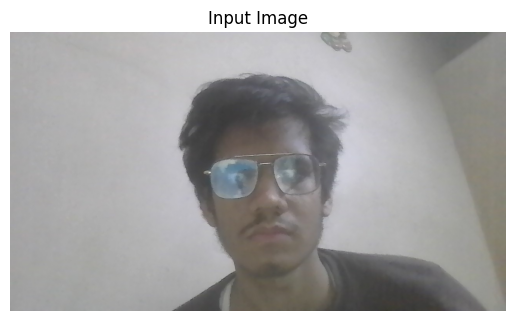

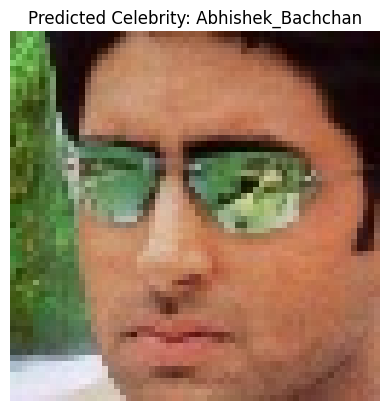

In [32]:
new_image_path = 'C:/Users/yugan/OneDrive/Pictures/Camera Roll/WIN_20231224_00_16_24_Pro.jpg'
predict_celebrity(new_image_path)